In [1]:
import xspec
from xspec import *
import numpy as np
import matplotlib.pyplot as plot1
from scipy.interpolate import interp1d
from scipy.optimize import minimize
from scipy.optimize import curve_fit
import os
import signal

In [ ]:
#Plotting all the energy spectra using the looping
base_dir = "/media/abhi/Data/Data/Galactic_transients"  
save_dir = "/media/abhi/Data/Data/Galactic_transients/All"

#Defining the exception
class TimeoutException(Exception):
    pass

def timeout_handler(signum, frame):
    raise TimeoutException()

signal.signal(signal.SIGALRM, timeout_handler)


for i in range(1,200):
    folder = os.path.join(base_dir, str(i))
    file_path = os.path.join(folder, "spec_grp_1.pi")
    #plot_file = os.path.join(save_dir, f"spec_{i}.png")

    os.chdir(folder)  
    xspec.AllData(file_path)
    #xspec.Plot.device = f"{plot_file} /png"
    xspec.Plot.xAxis = "keV"
    xspec.Plot("data")
    

    try:
        #Fitting model (broken Power law) and initial parameters
        model = xspec.Model("power")
        xspec.AllData.ignore("**-0.2 3.0-**")

        #initiate params
        model.bknpower.PhoIndx1 = 4
        model.bknpower.norm = 1

        #Fit
        #signal.alarm(5)
        xspec.Fit.perform()
        
        # Print parameter values
        a1 = model.bknpower.PhoIndx1.values[0]
        print("Photon Index1:", a1)

        
        #Plotting
        Plot("ufspec")
        energies = Plot.x()
        edeltas = Plot.xErr()
        rates = Plot.y(1,1)
        errors = Plot.yErr(1,1)
        foldedmodel = Plot.model()
        dataLabels = Plot.labels(1)
        
        nE = len(energies)
        stepenergies = [energies[i] - edeltas[i] for i in range(nE)]
        stepenergies.append(energies[-1] + edeltas[-1])
        foldedmodel_plot = foldedmodel.copy()
        foldedmodel_plot.append(foldedmodel_plot[-1])

        #Plotting
        #plot1.figure(figsize=(8, 6))
        plot1.xscale('log')
        plot1.yscale('log')
        plot1.ylabel(dataLabels[1])
        plot1.title(f"{i}")
        plot1.errorbar(energies, rates, xerr=edeltas, yerr=errors, fmt='.', label = f" a1 = {a1:.3f}\n a2= {a2:.3f}\n Ep= {Ep:.3f} keV")
        plot1.step(stepenergies, foldedmodel_plot, where='post')
        plot1.legend(loc='lower left')
        plot1.savefig(os.path.join(save_dir, f"{i}.png"), dpi=300)
        plot1.show()
        plot1.close()
                
        
        signal.alarm(0)
        
    except TimeoutException:
        print(f"Timeout: Skipping folder {i}")
        continue
    
    except Exception as e:
        print(f"Error in folder {i}: {e}")
        continue        
    
    finally:
        signal.alarm(0)  


1 spectrum  in use
 
Spectral Data File: /media/abhi/Data/Data/Galactic_transients/1/spec_grp_1.pi  Spectrum 1
Net count rate (cts/s) for Spectrum:1  4.862e-01 +/- 4.880e-02 (89.9 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-407
  Telescope: eROSITA Instrument: MERGED  Channel Type: PI
  Exposure Time: 227.3 sec
 Using fit statistic: chi
 Using Background File                ./em01_242105_020_BackgrSpec_00002_c010.fits
  Background Exposure Time: 227.3 sec
 Using Response (RMF) File            ./em01_242105_020_RMF_00002_c010.fits for Source 1
 Using Auxiliary Response (ARF) File  ./em01_242105_020_ARF_00002_c010.fits


Model powerlaw<1> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   powerlaw   PhoIndex            1.00000      +/-  0.0          
   2    1   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statisti


***Data loading interrupted by user.
***All spectra loading from currently open file will be lost.


.000000e+00 with 658 degrees of freedom
 Current data and model not fit yet.
     1 channels (1) ignored in spectrum #     1
   638 channels (23-660) ignored in spectrum #     1

Fit statistic  : Chi-Squared              4.214024e+09     using 21 bins.

Test statistic : Chi-Squared              4.214024e+09     using 21 bins.
 Null hypothesis probability of 0.000000e+00 with 19 degrees of freedom
 Current data and model not fit yet.


Spectrum #: 1 replaced 

1 spectrum  in use
 
Spectral Data File: /media/abhi/Data/Data/Galactic_transients/105/spec_grp_1.pi  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.884e-01 +/- 2.917e-02 (89.2 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-141
  Telescope: eROSITA Instrument: MERGED  Channel Type: PI
  Exposure Time: 380.4 sec
 Using fit statistic: chi
 Using Background File                ./em01_042108_020_BackgrSpec_00008_c010.fits
  Background Exposure Time: 380.4 sec
 Using Response (RMF) File            ./em0


1 spectrum  in use
 
Spectral Data File: /media/abhi/Data/Data/Galactic_transients/151/spec_grp_1.pi  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.970e+00 +/- 9.082e-02 (95.5 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-275
  Telescope: eROSITA Instrument: MERGED  Channel Type: PI
  Exposure Time: 250.2 sec
 Using fit statistic: chi
 Using Background File                ./em01_080090_020_BackgrSpec_00002_c010.fits
  Background Exposure Time: 250.2 sec
 Using Response (RMF) File            ./em01_080090_020_RMF_00002_c010.fits for Source 1
 Using Auxiliary Response (ARF) File  ./em01_080090_020_ARF_00002_c010.fits


Model powerlaw<1> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   powerlaw   PhoIndex            1.00000      +/-  0.0          
   2    1   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statis

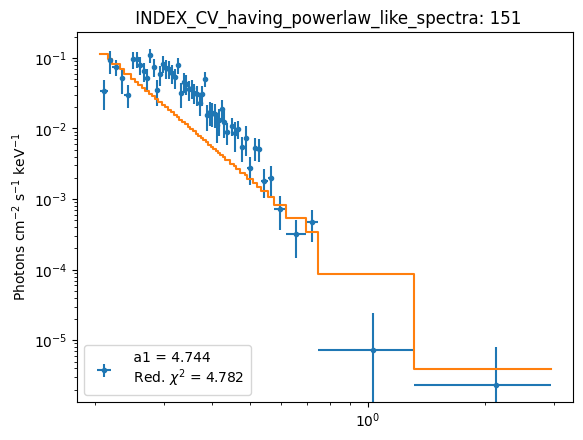


Spectrum #: 1 replaced 

1 spectrum  in use
 
Spectral Data File: /media/abhi/Data/Data/Galactic_transients/693/spec_grp_1.pi  Spectrum 1
Net count rate (cts/s) for Spectrum:1  6.179e-01 +/- 3.873e-02 (92.8 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-375
  Telescope: eROSITA Instrument: MERGED  Channel Type: PI
  Exposure Time: 444.4 sec
 Using fit statistic: chi
 Using Background File                ./em01_055117_020_BackgrSpec_00003_c010.fits
  Background Exposure Time: 444.4 sec
 Using Response (RMF) File            ./em01_055117_020_RMF_00003_c010.fits for Source 1
 Using Auxiliary Response (ARF) File  ./em01_055117_020_ARF_00003_c010.fits


Fit statistic  : Chi-Squared                10444.78     using 375 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number: 1

Test statistic : Chi-Squared                10444.78     using 375 bins.

***Warning: Chi-square may not be valid due to bins with zer

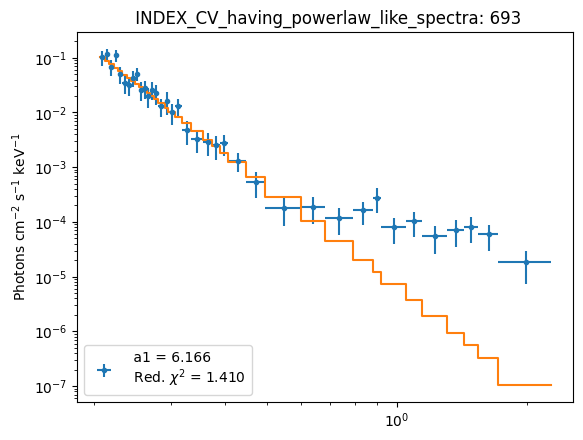


Spectrum #: 1 replaced 

1 spectrum  in use
 
Spectral Data File: /media/abhi/Data/Data/Galactic_transients/730/spec_grp_1.pi  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.540e+00 +/- 6.926e-02 (94.3 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-219
  Telescope: eROSITA Instrument: MERGED  Channel Type: PI
  Exposure Time: 340.5 sec
 Using fit statistic: chi
Photon Index1: 5.934721690358986
Reduced Chi sqaure: 1.6195050719278274
 Using Background File                ./em01_199123_020_BackgrSpec_00001_c010.fits
  Background Exposure Time: 340.5 sec
 Using Response (RMF) File            ./em01_199123_020_RMF_00001_c010.fits for Source 1
 Using Auxiliary Response (ARF) File  ./em01_199123_020_ARF_00001_c010.fits


Fit statistic  : Chi-Squared                15094.69     using 219 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number: 1

Test statistic : Chi-Squared                15094.69     using

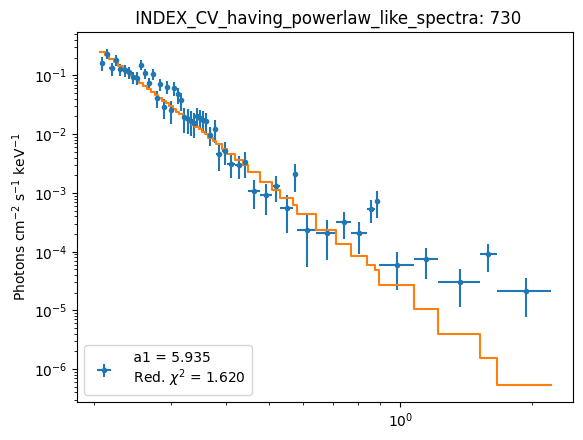


Spectrum #: 1 replaced 

1 spectrum  in use
 
Spectral Data File: /media/abhi/Data/Data/Galactic_transients/7/spec_grp_1.pi  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.167e+00 +/- 5.291e-02 (94.1 % total)
Photon Index1: 1.4254168668345295
Reduced Chi sqaure: 0.9199767471619574
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-276
  Telescope: eROSITA Instrument: MERGED  Channel Type: PI
  Exposure Time: 443.4 sec
 Using fit statistic: chi
 Using Background File                ./em01_048123_020_BackgrSpec_00001_c010.fits
  Background Exposure Time: 443.4 sec
 Using Response (RMF) File            ./em01_048123_020_RMF_00001_c010.fits for Source 1
 Using Auxiliary Response (ARF) File  ./em01_048123_020_ARF_00001_c010.fits


Fit statistic  : Chi-Squared                201123.2     using 276 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number: 1

Test statistic : Chi-Squared                201123.2     using 

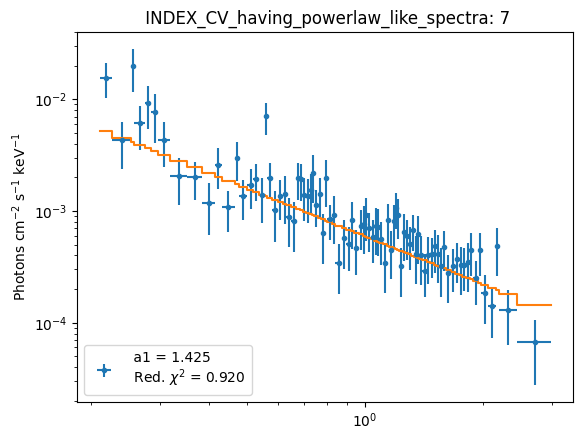


Spectrum #: 1 replaced 

1 spectrum  in use
 
Spectral Data File: /media/abhi/Data/Data/Galactic_transients/651/spec_grp_1.pi  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.495e+00 +/- 6.162e-02 (94.9 % total)
Photon Index1: 1.5838193967220366
Reduced Chi sqaure: 1.329162787607398
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-409
  Telescope: eROSITA Instrument: MERGED  Channel Type: PI
  Exposure Time: 415.1 sec
 Using fit statistic: chi
 Using Background File                ./em01_027159_020_BackgrSpec_00001_c010.fits
  Background Exposure Time: 415.1 sec
 Using Response (RMF) File            ./em01_027159_020_RMF_00001_c010.fits for Source 1
 Using Auxiliary Response (ARF) File  ./em01_027159_020_ARF_00001_c010.fits


Fit statistic  : Chi-Squared                  749.71     using 409 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number: 1

Test statistic : Chi-Squared                  749.71     using

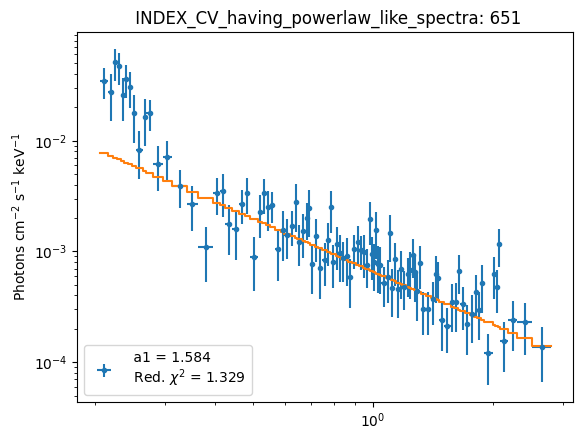


Spectrum #: 1 replaced 

1 spectrum  in use
 
Spectral Data File: /media/abhi/Data/Data/Galactic_transients/658/spec_grp_1.pi  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.803e-01 +/- 2.223e-02 (88.8 % total)
Photon Index1: 2.07325433449905
Reduced Chi sqaure: 1.0828522823647397
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-386
  Telescope: eROSITA Instrument: MERGED  Channel Type: PI
  Exposure Time: 639.7 sec
 Using fit statistic: chi
 Using Background File                ./em01_085135_020_BackgrSpec_00009_c010.fits
  Background Exposure Time: 639.7 sec
 Using Response (RMF) File            ./em01_085135_020_RMF_00009_c010.fits for Source 1
 Using Auxiliary Response (ARF) File  ./em01_085135_020_ARF_00009_c010.fits


Fit statistic  : Chi-Squared                 3215.64     using 386 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number: 1

Test statistic : Chi-Squared                 3215.64     using 

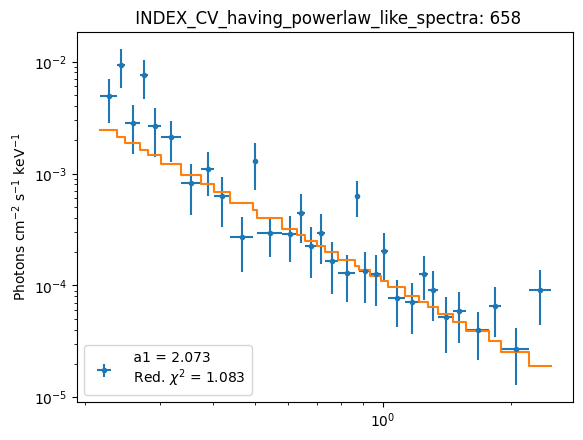


Spectrum #: 1 replaced 

1 spectrum  in use
 
Spectral Data File: /media/abhi/Data/Data/Galactic_transients/678/spec_grp_1.pi  Spectrum 1
Net count rate (cts/s) for Spectrum:1  8.759e+00 +/- 1.505e-01 (97.7 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-402
  Telescope: eROSITA Instrument: MERGED  Channel Type: PI
  Exposure Time: 395.9 sec
 Using fit statistic: chi
 Using Background File                ./em01_213135_020_BackgrSpec_00001_c010.fits
  Background Exposure Time: 395.9 sec
 Using Response (RMF) File            ./em01_213135_020_RMF_00001_c010.fits for Source 1
 Using Auxiliary Response (ARF) File  ./em01_213135_020_ARF_00001_c010.fits


Fit statistic  : Chi-Squared                 3363.94     using 402 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number: 1

Test statistic : Chi-Squared                 3363.94     using 402 bins.

***Warning: Chi-square may not be valid due to bins with zer


*** Warning: User interrupted fit, fit not valid.


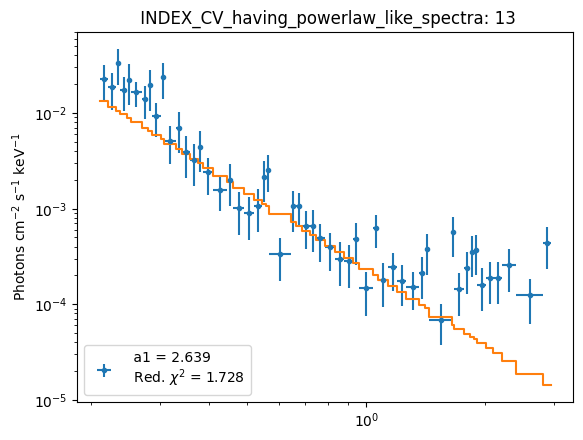


Spectrum #: 1 replaced 

1 spectrum  in use
 
Spectral Data File: /media/abhi/Data/Data/Galactic_transients/664/spec_grp_1.pi  Spectrum 1
Net count rate (cts/s) for Spectrum:1  5.109e+00 +/- 1.553e-01 (97.7 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-330
  Telescope: eROSITA Instrument: MERGED  Channel Type: PI
  Exposure Time: 216.9 sec
 Using fit statistic: chi
 Using Background File                ./em01_105108_020_BackgrSpec_00001_c010.fits
  Background Exposure Time: 216.9 sec
 Using Response (RMF) File            ./em01_105108_020_RMF_00001_c010.fits for Source 1
 Using Auxiliary Response (ARF) File  ./em01_105108_020_ARF_00001_c010.fits


Fit statistic  : Chi-Squared                  989.94     using 330 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number: 1

Test statistic : Chi-Squared                  989.94     using 330 bins.

***Warning: Chi-square may not be valid due to bins with zer

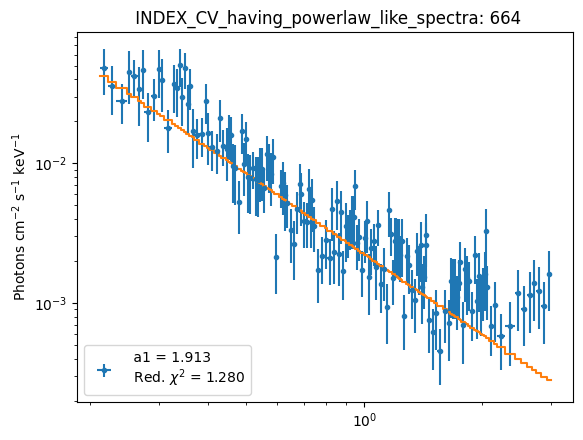

In [3]:
#Loop
#Plotting all the energy spectra using the looping
base_dir = "/media/abhi/Data/Data/Galactic_transients"  
save_dir = "/media/abhi/Data/Data/Galactic_transients/Vikasgraphs"

#Defining the exception
class TimeoutException(Exception):
    pass

def timeout_handler(signum, frame):
    raise TimeoutException()

signal.signal(signal.SIGALRM, timeout_handler)


for i in INDEX_CV_having_powerlaw_like_spectra:
    folder = os.path.join(base_dir, str(i))
    file_path = os.path.join(folder, "spec_grp_1.pi")
    plot_file = os.path.join(save_dir, f"spec_{i}.png")

    os.chdir(folder)  
    xspec.AllData(file_path)
    xspec.Plot.device = f"{plot_file} /png"
    xspec.Plot.xAxis = "keV"
    xspec.Plot("data")
    

    try:
        #Fitting model (Power law) and initial parameters
        model = xspec.Model("powerlaw")
        xspec.AllData.ignore("**-0.2 3.0-**")

        #initiate params
        model.powerlaw.PhoIndex = 1
        model.powerlaw.norm = 1

        #Fit
        xspec.Fit.perform()
        
        # Print parameter values
        a1 = model.powerlaw.PhoIndex.values[0]
        x_2 = Fit.statistic/Fit.dof
        print("Photon Index1:", a1)
        print("Reduced Chi sqaure:", x_2)

        #Plotting
        Plot("ufspec")
        energies = Plot.x()
        edeltas = Plot.xErr()
        rates = Plot.y(1,1)
        errors = Plot.yErr(1,1)
        foldedmodel = Plot.model()
        dataLabels = Plot.labels(1)
        
        nE = len(energies)
        stepenergies = [energies[i] - edeltas[i] for i in range(nE)]
        stepenergies.append(energies[-1] + edeltas[-1])
        foldedmodel_plot = foldedmodel.copy()
        foldedmodel_plot.append(foldedmodel_plot[-1])

        #Plotting
        #plot1.figure(figsize=(8, 6))
        plot1.xscale('log')
        plot1.yscale('log')
        plot1.ylabel(dataLabels[1])
        plot1.title(f" INDEX_CV_having_powerlaw_like_spectra: {i}")
        plot1.errorbar(energies, rates, xerr=edeltas, yerr=errors, fmt='.', label = f" a1 = {a1:.3f}\n Red. $\chi^2$ = {x_2:.3f} ")
        plot1.step(stepenergies, foldedmodel_plot, where='post')
        plot1.legend(loc='lower left')
        plot1.savefig(os.path.join(save_dir, f"{i}.png"), dpi=300)
        plot1.show()
        plot1.close()
                
        
        signal.alarm(0)
        
    except TimeoutException:
        print(f"Timeout: Skipping folder {i}")
        continue
    
    except Exception as e:
        print(f"Error in folder {i}: {e}")
        continue        
    
    finally:
        signal.alarm(0)  